<a href="https://colab.research.google.com/github/CamilaALiv/Projeto-Ifood/blob/main/Projeto_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ifood - Análise Exploratória e Estratégias de Marketing**

Esse projeto foi realizado como atividade sugerida do curso de Estatística do Básico ao Avançado - EBA, e está dividido em três partes:

Primeiro a análise exploratória do dataset que contém dados de perfil de clientes da plataforma Ifood e seus gastos na plataforma. Na segunda parte, vamos solucionar uma demanda da equipe de marketing, que deseja saber para qual segmento de clientes direcionar uma campanha. Por último, saberemos se os clientes que já registraram alguma reclamação na plataforma, tem hábitos de consumo diferentes dos clientes que não registraram nenhuma reclamação (deixaram de comprar na plataforma).

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

Vamos iniciar com uma análise exploratória dos dados para conhecer melhor o perfil dos clientes e quais insights podemos gerar com esses dados.


In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# lendo o arquivo csv que contém os dados:
df = pd.read_csv('/content/drive/MyDrive/Dados/mkt_data.csv', index_col=0) # usando a primeira coluna do df como o index

## Análise Exploratória

Verificando as primeiras linhas do nosso dataset:

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,58138.0,0,0,58,635,88,546,172,88,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Verificando o tamanho do dataset (quantidade de linhas e colunas):

In [ ]:
df.shape #Retorna quantas linhas e colunas temos no dataset

(2205, 43)

Verificando os tipos de colunas do nosso dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Verificando a existência de dados duplicados:

In [ ]:
df.duplicated().value_counts() # verifica dados duplicados e conta a ocorrência deles

False    2021
True      184
dtype: int64

Excluindo os dados duplicados e verificando o tamanho do dataset após alteração:

In [ ]:
df.drop_duplicates(inplace=True) # excluindo dados duplicados do nosso dataframe

In [ ]:
df.shape #verificando a quantidade de linhas e colunas do dataframe após a exclusão das linhas duplicadas

(2021, 43)

Verificando a existência de dados nulos nessa base:

In [ ]:
df.isnull().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1807
marital_Married         1236
marital_Single          1578
marital_Together        1512
marital_Widow           1951
education_2n Cycle      1838
education_Basic         1972
education_Graduation    1006
education_Mast

In [ ]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [ ]:
df['education_level'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Verificamos que os dados nulos estão em colunas que apresentam os dados das colunas *marital_status* e *education_level* de outra forma. Esses dados não foram preenchidos por não corresponderem à realidade daquele entrevistado.

Vamos manter essas colunas na análise e transformar esses dados em dados booleanos, assim poderemos utilizados posteriormente na análise, caso seja necessário.

In [ ]:
# criando uma lista com as colunas que serão transformadas
colunas_booleanas = ['marital_Divorced', 'marital_Married','marital_Single',
    'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic',
    'education_Graduation', 'education_Master', 'education_PhD']

In [ ]:
#Substituindo os valores nulos por False e os valores presentes por True.
for coluna in colunas_booleanas:
  df[coluna + '_booleana'] = np.where(df[coluna].isnull(), False, True)


In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Divorced_booleana,marital_Married_booleana,marital_Single_booleana,marital_Together_booleana,marital_Widow_booleana,education_2n Cycle_booleana,education_Basic_booleana,education_Graduation_booleana,education_Master_booleana,education_PhD_booleana
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,True,False,False,False,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,True,False,False,False,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,True,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,True,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,True,False,False,False,False,False,False,False,True


Estatística descritiva do dataset através do método 'describe':

Média, desvio padrão, mínimo, 25 percentil, mediana, 75 percentil e máximo de cada colunas numéricas.

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,183.0,49.0,1015.0,335.0,439.0,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,1.0,2.0,3.0,4.0,5.0,563.789213,519.867392,0.302326,0.952994,563.789213
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.0,0.0,0.0,0.0,0.0,576.775749,554.797857,0.680812,0.746123,576.775749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.000000,0.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,1.0,2.0,3.0,4.0,5.0,55.000000,42.000000,0.000000,0.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.000000,1.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,883.000000,0.000000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.000000,3.000000,2491.000000


## Entendendo o perfil do cliente:

### 1.Renda:
Menor e maior salário encontrado na nossa base (rendimento anual):

In [ ]:
menor_salario = df.Income.min()
maior_salario = df.Income.max()

print('O menor salário encontrado foi:', menor_salario )
print('O maior salário encontrado foi:', maior_salario )

O menor salário encontrado foi: 1730.0
O maior salário encontrado foi: 113734.0


Distribuição de salário dos clientes do nosso dataset:

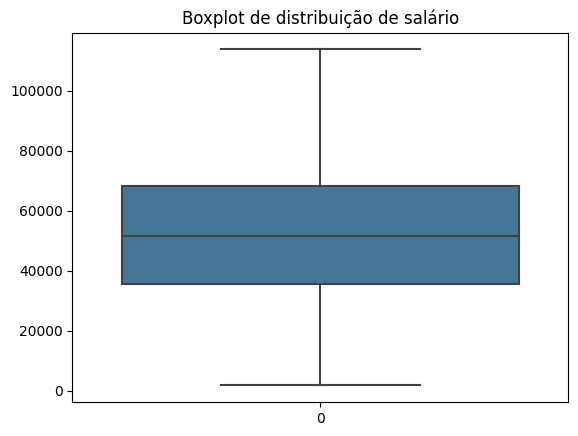

In [ ]:
sns.boxplot(df.Income, palette = "mako")
plt.title("Boxplot de distribuição de salário")
plt.show()

Apesar da grande disperção de valores, com algumas pessoas ganhando pouco e outras ganhando muito, não notamos outliers na nossa base. A maior parte dos nossos clientes recebem entre 35000 e 70000 anual.

### 2.Educação:

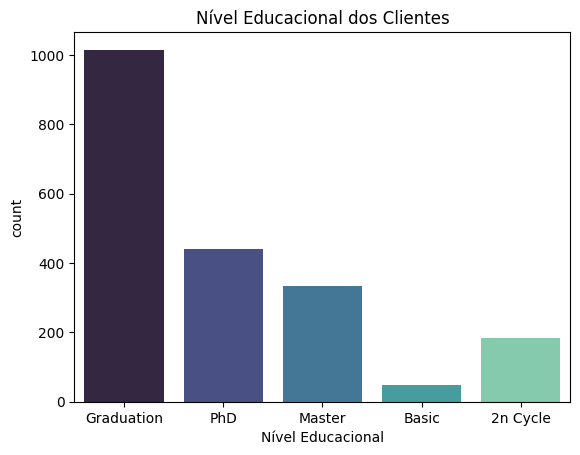

In [ ]:
sns.countplot(x=df["education_level"], palette = "mako" )
plt.title("Nível Educacional dos Clientes")
plt.xlabel("Nível Educacional")
plt.show()

Vimos que a maior parte dos clientes da plataforma possuem nível superior.

### 3.Estado Civil:

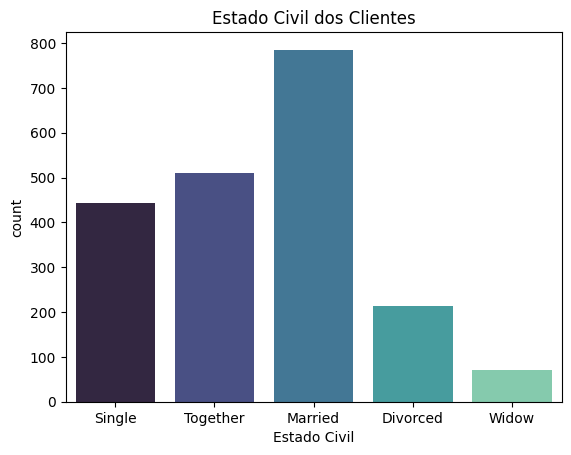

In [ ]:
sns.countplot(x=df["marital_status"], palette = "mako" )
plt.title("Estado Civil dos Clientes")
plt.xlabel("Estado Civil")
plt.show()

A maior parte dos clientes são casados, mas clientes que vivem juntos e clientes solteiros também são uma parcela considerável de clientes.

### 4.Relação entre estado civil e quantidade de filhos:

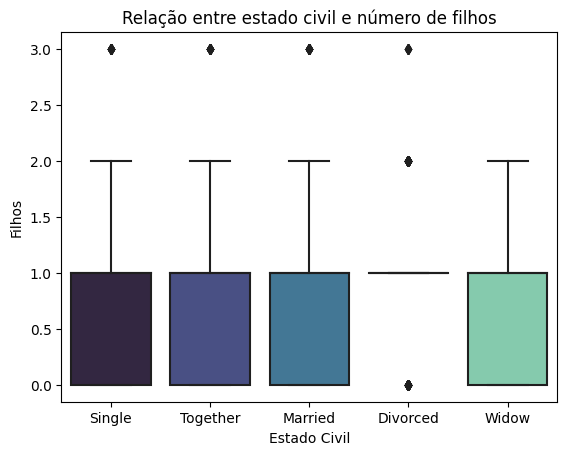

In [ ]:
sns.boxplot(x=df["marital_status"], y=df["kids"], palette= "mako")
plt.title("Relação entre estado civil e número de filhos")
plt.xlabel("Estado Civil")
plt.ylabel("Filhos")
plt.show()

Pelo boxplot, não é possivel concluir que as pessoas casadas da nossa amostra possuem mais filhos do que as pessoas com outro estado civil. Vamos analisar a média para procurar mais informações.

In [ ]:
df.groupby("marital_status")["kids"].mean()

marital_status
Divorced    1.023364
Married     0.977070
Single      0.860045
Together    0.982318
Widow       0.842857
Name: kids, dtype: float64

A média de filhos das pessoas divorciadas da nossa amostra é um pouco maior do que a média dos demais status, seguido de casados, pessoas que vivem juntas, solteiros e por último viúvos. Mesmo assim, não temos uma diferença muito grande entre as classes.

***Com os dados que exploramos até agora, podemos levantar algumas perguntas relevantes para o nosso negócio:***

1- Pessoas que recebem um maior salário gastam mais?

2- As pessoas gastam mais ou menos em nossa plataforma quando tem filhos?


### Pessoas que recebem um maior salário gastam mais?


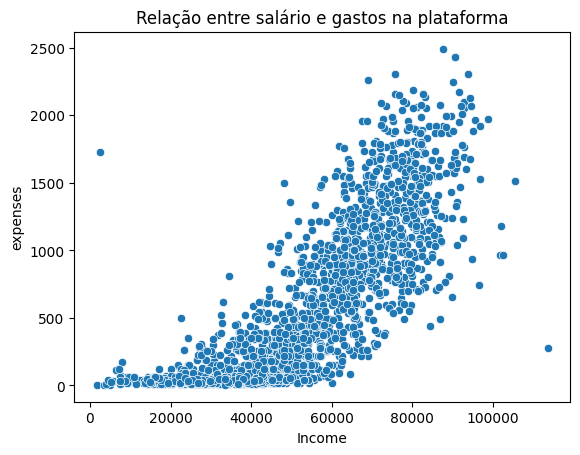

In [ ]:
sns.scatterplot(x= df.Income, y= df.expenses)
plt.title("Relação entre salário e gastos na plataforma")
plt.show()

Pelo gráfico de dispersão notamos uma correlação positiva entre as variáveis salário(Income) e valos gasto na plataforma(Expenses), ou seja, os gastos são maiores em clientes que recebem um salário maior.

### As pessoas gastam mais ou menos em nossa plataforma quando tem filhos?

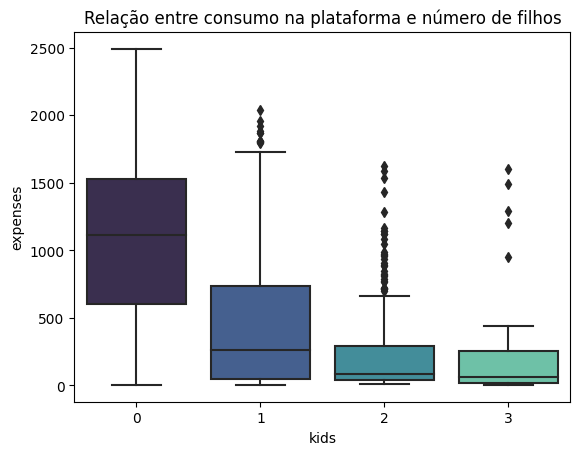

In [ ]:
sns.boxplot(x= df.kids, y= df.expenses, palette= 'mako' )
plt.title('Relação entre consumo na plataforma e número de filhos')
plt.show()

In [ ]:
df.groupby("kids")["expenses"].mean()

kids
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: expenses, dtype: float64

Nota-se que pessoas sem filhos gastam muito mais na nossa plataforma do que pessoas com filhos, tendo a média de gastos acima de 1000. Pessoas com mais filhos gastam menos do que pessoas com apenas 1 filho, ficando bem próximas as médias de gastos de pessoas com 2 e 3 filhos. Mesmo com a presença de vários outliers nos grupos com 2 ou 3 filhos, o que influencia na média desses grupos, ainda notamos essa diferença no consumo. Ainda analisando o gráfico, vemos a linha da mediana, próxima de zero, provavelmente um pouco abaixo de 100 nos grupos 2 e 3; e na faixa de 1100 para o grupo 0 (sem filhos).

## Análise para direcionamento de Campanha de Marketing

Na nossa análise de dados anterior, vimos que pessoas sem filhos gastam mais do que pessoas com mais filhos. Nossa equipe de marketing pensou em fazer campanhas direcionadas ao grupo de pessoas com filho (independente da quantidade), porém precisamos comprovar se de fato as médias de gastos dos grupos é diferente. Para isso, vamos adotar a seguinte prática:

1. Agrupar todas as pessoas que tem filhos em um grupo chamado "com filhos" e comparar a média de gastos de pessoas sem filhos e pessoas com filhos.

2. Comparar os grupos de pessoas com filhos. O time de marketing nos pediu para verificar se há diferenças de gastos (expenses) em quem tem 1, 2, 3 ou mais filhos para que eles possam afunilar mais ainda a campanha. A média desses grupos é diferente? Qual(is) tem menor média?

### 1. Agrupando todas as pessoas que tem filhos para comparar a média de gastos de pessoas sem filhos e pessoas com filhos.

Vamos criar uma coluna nova no nosso dataset chamada grupo_filhos e preenche-lá com 'yes' para pessoas que possuam filhos (qualquer quantidade) e 'no' para pessoas que não possuam filhos.

In [ ]:
# Criando uma função que atribui 'yes' se tiver filhos (kids > 0) e 'no' caso contrário
def atribuir_grupo(kids):
    if kids > 0:
        return 'yes'  # Tem filhos
    else:
        return 'no'  # Não tem filhos

# Aplicando a função e criando a nova coluna "grupo_filhos"
df['grupo_filhos'] = df['kids'].apply(atribuir_grupo)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Married_booleana,marital_Single_booleana,marital_Together_booleana,marital_Widow_booleana,education_2n Cycle_booleana,education_Basic_booleana,education_Graduation_booleana,education_Master_booleana,education_PhD_booleana,grupo_filhos
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,True,False,False,False,False,True,False,False,no
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,True,False,False,False,False,True,False,False,yes
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,True,False,False,False,True,False,False,no
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,True,False,False,False,True,False,False,yes
4,58293.0,1,0,94,173,43,118,46,27,15,...,True,False,False,False,False,False,False,False,True,yes


Vamos descobrir a quantidade de pessoas com filhos e sem filhos no nosso conjunto de dados:

In [ ]:
# Contando a frequência de cada valor na coluna "grupo_filhos"
contagem_filhos = df['grupo_filhos'].value_counts()

# Exibindo a contagem de pessoas com e sem filhos
print('Quantidade de pessoas COM filhos:', contagem_filhos['yes'])  # Pessoas com filhos
print('Quantidade de pessoas SEM filhos:', contagem_filhos['no'])  # Pessoas sem filhos

Quantidade de pessoas COM filhos: 1454
Quantidade de pessoas SEM filhos: 567


Descobrindo o valor médio de gastos na plataforma de pessoas sem filhos e pessoas com filhos:

In [ ]:
# Agrupando por grupo_filhos e calculando a média de expenses
media_gastos = df.groupby('grupo_filhos')['expenses'].mean()

# Exibindo a média de gastos para pessoas sem filhos (grupo_filhos = no) e com filhos (grupo_filhos = yes)
print('Média de gastos para pessoas SEM filhos:')
print(media_gastos['no'])  # Média para pessoas sem filhos

print('Média de gastos para pessoas COM filhos:')
print(media_gastos['yes'])  # Média para pessoas com filhos


Média de gastos para pessoas SEM filhos:
1056.2821869488537
Média de gastos para pessoas COM filhos:
371.7372764786795


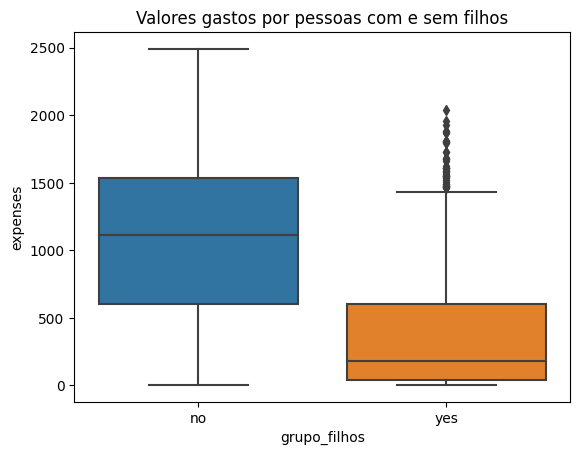

In [ ]:
# boxplot dos valores gastos por pessoas com e sem filhos
sns.boxplot(x= df['grupo_filhos'], y= df['expenses'])
plt.title('Valores gastos por pessoas com e sem filhos')
plt.show()


Mesmo com os valores das médias tão diferentes, vemos que alguns valores estão se sobrepondos nos nossos boxplots. Vemos também uma quantidade relativamente grande de outlier no grupo de pessoas com filhos. Portanto, vamos realizar um teste de hipótese para comprovar a diferença entre as médias.

**Teste t para média de amostras independentes**

In [ ]:
# HO: média de no = média de yes
# HA: média de no != média de yes
# alpha = 0,05

from scipy.stats import ttest_ind

In [ ]:
com_filhos = df[df['grupo_filhos'] == 'yes']['expenses']
sem_filhos = df[df['grupo_filhos'] == 'no']['expenses']
ttest_ind(com_filhos, sem_filhos)


TtestResult(statistic=-28.330924413063926, pvalue=5.960960308676077e-149, df=2019.0)

Com o p-valor muito abaixo do nível de significância, podemos afirmar com 95% de confiança que as médias de gastos de pessoas sem filhos e pessoas com filhos são diferentes.

### 2. Comparação entre os grupos de pessoas com filhos:

A pedido do time de marketing, vamos verificar se há diferenças de gastos (expenses) em quem tem 1, 2, 3 ou mais filhos para que eles possam afunilar mais ainda a campanha.

In [ ]:
# Conferindo quantas amostras temos em cada grupo:
df.kids.value_counts()

1    1027
0     567
2     382
3      45
Name: kids, dtype: int64

In [ ]:
# Agrupando por quantidade de filhos e calculando a média de expenses
media_gastos_filhos = df.groupby('kids')['expenses'].mean()

# Exibindo a média de gastos para pessoas com 1, 2 e 3 filhos
print('Média de gastos para pessoas com 1 filho:')
print(media_gastos_filhos[1])

print('Média de gastos para pessoas com 2 filhos:')
print(media_gastos_filhos[2])

print('Média de gastos para pessoas com 3 filhos:')
print(media_gastos_filhos[3])


Média de gastos para pessoas com 1 filho:
432.73222979552094
Média de gastos para pessoas com 2 filhos:
223.2670157068063
Média de gastos para pessoas com 3 filhos:
240.04444444444445


Aqui vemos a média de gastos de pessoas com 2 e 3 filhos bem próximas, enquanto a média de gastos para pessoas com 1 filho é aparentemente bem maior. Vamos realizar o teste de hipótese para saber se as médias realmente são diferentes. Como temos 3 variáveis, podemos usar a ANOVA de Welch para descobrirmos se estatisticamente essas médias são iguais.



### Realizando o teste da ANOVA de Welch:

In [ ]:
# HO: as médias de gastos de 1,2 e 3 filhos são igual
# HA: pelo menos uma média de gastos é diferente
# alpha = 0,05

# instalando e importando o pacote pingouin
!pip install pingouin -q
import pingouin as pg

In [ ]:
# criando um dataframe apenas com as pessoas com filhos
df_com_filhos = df[df['grupo_filhos'] == 'yes']
pg.welch_anova(dv= 'expenses', between= 'kids', data= df_com_filhos )


,Source,ddof1,ddof2,F,p-unc,np2
0,kids,2,118.556585,52.390113,4.970691e-17,0.049766


O teste retornou um objeto com os resultados da ANOVA de Welch, incluindo a estatística F, e o p-valor. Com o p-valor muito abaixo do nível de significância, podemos afirmar com 95% de confiança que pelo menos uma das médias é diferente das demais.

### Post Hoc
Para descobrir qual das médias é a diferente, utilizaremos um teste Post Hoc. O teste post-hoc de Games-Howell é outra abordagem não paramétrica para comparar combinações de grupos ou tratamentos. O teste de Games-Howell não assume variâncias, tamanhos amostrais iguais e nem amostras normais.

In [ ]:
pg.pairwise_gameshowell(dv='expenses', between='kids', data= df_com_filhos)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,432.732230,223.267016,209.465214,20.643062,10.147003,1036.085907,0.000000,0.505500
1,1,3,432.732230,240.044444,192.687785,62.370624,3.089400,48.825102,0.009111,0.429201
2,2,3,223.267016,240.044444,-16.777429,62.620637,-0.267922,49.596797,0.961234,-0.054189


Quando o p-valor for maior que 0,05 não rejeitamos a hipótese nula e dizemos que as médias são estatisticamente igual. Comparando os pares, vimos que:
- Média grupo 1 e média grupo 2 são diferentes.
- Média grupo 1 e média grupo 3 são diferentes.
- Média grupo 2 e média grupo 3 são iguais.

Se a opção da equipe de marketing for focar nos grupos com menor média de gastos, eles poderão focar tanto no grupo 2 quanto no grupo 3 ou até mesmo direcionar uma campanha em conjunto para ambos os grupos. Caso a equipe queira focar no grupo com maior média de gastos, eles devem focar no grupo com 1 filho.


## Clientes que reclamam na plataforma, se tornam detratores?

Queremos agora saber se o fato de uma pessoa reclamar na plataforma a torna detratora (detrator aqui seria não comprar mais em nossa plataforma).

A coluna que usarmos para saber se um cliente reclamou ou não na plataforma é a coluna Complain. Com base nela, veremos se o grupo de pessoas que reclamam tem menos gastos do que pessoas que não reclamam.



### Analisando alguns dados sobre os grupos com reclamação e sem reclamação:

Média de gastos dos grupos que reclamaram e que não reclamaram na plataforma.

In [ ]:
# média de gastos de cada grupo (0 - sem reclamação, 1 - com reclamação)
df.groupby('Complain')['expenses'].mean()

Complain
0    565.523976
1    381.000000
Name: expenses, dtype: float64

Quantidade de pessoas que reclamaram no site (representados pelo número 1).

In [ ]:
# quantidade de pessoas que fizeram alguma reclamação
df['Complain'].value_counts()


0    2002
1      19
Name: Complain, dtype: int64

Mediana de gastos de cada um dos dois grupos:

In [ ]:
df.groupby('Complain')['expenses'].median()

Complain
0    344.5
1     89.0
Name: expenses, dtype: float64

Variância de gastos de cada grupo:

In [ ]:
df.groupby('Complain')['expenses'].var()

Complain
0    333853.692828
1    183991.333333
Name: expenses, dtype: float64

Vamos iniciar nossos testes de hipóteses utilizando o teste t (teste paramétrico). Aqui estamos no limite do tamanho mínimo para que possamos assumir a normalidade da distribuição das amostras do grupo dos que reclamaram. Como aparentemente as variâncias dos grupos são diferentes,  vamos realizar um teste F para confirmarmos se as variâncias são iguais ou diferentes para que possamos ou não realizar nosso teste t para amostras independentes com variâncias iguais.

### Teste F para variância

In [ ]:
import scipy.stats

# Teste f para variância
# H0: as variâncias são iguais
# HA: as variâncias são diferentes
# alpha = 0,05

df_no_complain = 2002 - 1 # graus de liberdade não reclamaram
df_complain = 19 - 1 # graus de liberdade reclamaram
F = 333853.692828 / 183991.333333

#p-valor para o teste F
1 - scipy.stats.f.cdf(F, df_no_complain, df_complain)

0.06599439060804446

Com o p-valor maior que o nível de significância, não rejeitamos a hipótese nulo e assumimos que a variância dos dois grupos são estatisticamente iguais.
Dessa forma, vamos utilizar um teste t para amostras independentes com variância igual.

### Teste t para amostras independentes (paramétrico):

In [ ]:
# HO: as médias de gastos dos grupos são iguais
# HA: as médias de gastos dos grupos são diferentes
# alpha = 0,05

grupo_no_complain = df[df['Complain'] == 0]['expenses']
grupo_complain = df[df['Complain'] == 1]['expenses']
ttest_ind(grupo_no_complain, grupo_complain)

TtestResult(statistic=1.3882610846748031, pvalue=0.1652107099905997, df=2019.0)

Com o p-valor encontrado foi maior que o nível de significância, não rejeitamos a hipótese nula e dizemos que a média de gastos dos grupo que reclamaram e que não reclamaram são estatisticamente iguais.

A título de comprovação, devido ao tamanho de uma das amostras não ser tão grande, vamos realizar um teste não-paramétrico também.

### Teste de Mann-Whitney (não-paramétrico):

Relembrando nossas hipóteses:

HO: as médias de gastos dos grupos são iguais

HA: as médias de gastos dos grupos são diferentes

alpha = 0,05

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(grupo_no_complain, grupo_complain)


MannwhitneyuResult(statistic=22796.5, pvalue=0.1357236125811575)

Com o p-valor novamente maior que nosso nível de significância, não podemos rejeitar nossa hipótese nula e dizemos que a média de gastos dos grupo que reclamaram e não reclamaram são estatisticamente iguais.

Com base no que vimos nos testes, não podemos afirmar que os clientes que reclamam da plataforma deixaram de consumir após a reclamação.